In [6]:
import evopipe
import warnings

from sklearn.model_selection import train_test_split
from sklearn import datasets

from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer
from sklearn.decomposition import PCA, KernelPCA, NMF
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import matplotlib.pyplot as plt
import seaborn as sns

preproc_l = [MinMaxScaler(), StandardScaler(), Normalizer(), Binarizer(), PCA(), KernelPCA(), NMF(), SelectKBest(chi2)]
classif_l = [SVC(), LinearSVC(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(),
             AdaBoostClassifier(), QuadraticDiscriminantAnalysis()]

In [7]:
wine = datasets.load_wine()
train_X, test_X, train_Y, test_Y = train_test_split(wine.data, wine.target, test_size = 0.25, random_state = 0)

In [8]:
print("Format:")
print("------------")
print("Classifier")
print("score")
print("cross-validation score")
print("------------")
print()

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for classif in classif_l:
        print(classif.__class__.__name__)
        classif.fit(train_X, train_Y)
        print(classif.score(test_X, test_Y))
        print(cross_val_score(classif, test_X, test_Y).mean())
        print()

Format:
------------
Classifier
score
cross-validation score
------------

SVC
0.5111111111111111
0.4680555555555556

LinearSVC
0.9111111111111111
0.7623015873015874

KNeighborsClassifier
0.7333333333333333
0.8009920634920635

DecisionTreeClassifier
0.9333333333333333
0.8230158730158731

RandomForestClassifier
0.9777777777777777
0.9569444444444445

AdaBoostClassifier
0.8666666666666667
0.9109126984126984

QuadraticDiscriminantAnalysis
1.0
0.4680555555555556



In [9]:
clf = evopipe.EvoPipeClassifier(preproc_l, classif_l, 2, pop_size=50, ngen=30)
clf.fit(train_X, train_Y)

score = clf.score(test_X, test_Y)
print("\nBest pipeline test score: {}\n".format(score))

best_pipes = clf.best_pipelines()

for pipe in best_pipes:
    pipe.fit(train_X, train_Y)
    score = pipe.score(test_X, test_Y)
    
    pipe_named_steps = []
    for key, val in pipe.steps:
        pipe_named_steps.append(key)       
    print("Score: {}, Pipe: {}".format(score, pipe_named_steps))

C:\Anaconda\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'PipeFitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
C:\Anaconda\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)



Gen 1:

Hall of fame:
['standardscaler', 'minmaxscaler', 'linearsvc']
['minmaxscaler-1', 'minmaxscaler-2', 'kneighborsclassifier']
['minmaxscaler', 'kernelpca', 'linearsvc']
['standardscaler', 'minmaxscaler', 'kneighborsclassifier']
['minmaxscaler', 'standardscaler', 'svc']

Gen 6:

Hall of fame:
['standardscaler', 'minmaxscaler', 'linearsvc']
['minmaxscaler-1', 'minmaxscaler-2', 'kneighborsclassifier']
['minmaxscaler', 'kernelpca', 'linearsvc']
['standardscaler', 'minmaxscaler', 'kneighborsclassifier']
['minmaxscaler', 'standardscaler', 'svc']

Gen 11:

Hall of fame:
['standardscaler', 'minmaxscaler', 'linearsvc']
['minmaxscaler-1', 'minmaxscaler-2', 'kneighborsclassifier']
['minmaxscaler', 'kernelpca', 'linearsvc']
['standardscaler', 'minmaxscaler', 'kneighborsclassifier']
['minmaxscaler', 'standardscaler', 'svc']

Gen 16:

Hall of fame:
['standardscaler', 'minmaxscaler', 'linearsvc']
['minmaxscaler-1', 'minmaxscaler-2', 'kneighborsclassifier']
['minmaxscaler', 'kernelpca', 'linears

gen	avg     	min     	max    
0  	0.889982	0.338787	0.97018
1  	0.946011	0.277806	0.97018
2  	0.9366  	0.277806	0.97018
3  	0.957551	0.376007	0.97018
4  	0.969596	0.948264	0.97018
5  	0.966536	0.803375	0.97018
6  	0.954361	0.292122	0.97018
7  	0.968852	0.933442	0.97018
8  	0.966264	0.803375	0.97018
9  	0.968397	0.925208	0.97018
10 	0.965233	0.730099	0.97018
11 	0.969596	0.948264	0.97018
12 	0.96838 	0.880213	0.97018
13 	0.962031	0.729548	0.97018
14 	0.97018 	0.97018 	0.97018
15 	0.96989 	0.955687	0.97018
16 	0.970169	0.969674	0.97018
17 	0.968232	0.887965	0.97018
18 	0.966843	0.803375	0.97018
19 	0.958129	0.367643	0.97018
20 	0.96867 	0.894705	0.97018
21 	0.969162	0.955511	0.97018
22 	0.966843	0.803375	0.97018
23 	0.966874	0.819055	0.97018
24 	0.951604	0.376007	0.97018
25 	0.958119	0.367643	0.97018
26 	0.97018 	0.97018 	0.97018
27 	0.966102	0.803375	0.97018
28 	0.956935	0.308461	0.97018
29 	0.956921	0.308461	0.97018


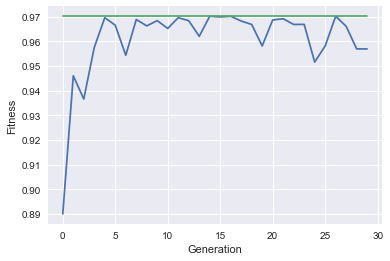

In [10]:
print(clf.logbook)

gen = clf.logbook.select("gen")
avgs, mins, maxs, vars = clf.logbook.select("avg", "min", "max", "var")

sns.set()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(gen, avgs, label='Average')
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness")

ax1.plot(gen, maxs, label='Maximum')
ax1.set_xlabel("Generation")
# ax1.set_ylabel("Maximum Fitness")

plt.show()